In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
data=pd.read_excel("C:/Users/Hp/Documents/Datasets/default of credit card clients.xls",header=0)
data.info()
data.describe()
# droping unwanted rows and columns
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
print(data.drop(0,inplace=True))
print(data.head())
# dividing data into dependent and independent variables
ind=data.iloc[:,0:23].values
dep=data.iloc[:,23:24].values
dep=dep.astype('int')
# spliting data into train and test phase
x_train,x_test,y_train,y_test=train_test_split(ind,dep,test_size=0.75,random_state=0)
# building model
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
pred=tree.predict(x_test)
print(type(pred))
print(type(y_test))
print(confusion_matrix(y_test,pred))
tree=DecisionTreeClassifier(criterion="gini",max_depth=4,min_samples_leaf=2,min_samples_split=3)
tree.fit(x_train,y_train)
pred=tree.predict(x_test)
print(type(pred))
print(type(y_test))
print(confusion_matrix(y_test,pred))
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':('gini','entropy'),'max_depth':(2,3,4,5,6,7,8),'min_samples_leaf':(2,3,4,5,6,7,8)}
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,cv=3)
grid_model=grid.fit(x_train,y_train)
grid_model.best_estimator_
tree=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
tree.fit(x_train,y_train)
pred=tree.predict(x_test)
print(type(pred))
print(type(y_test))
print(confusion_matrix(y_test,pred))
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
accuracy_score(y_test,pred)
from sklearn.ensemble import AdaBoostClassifier
boost=AdaBoostClassifier()
boost.fit(x_train,y_train)
pred=boost.predict(x_test)
accuracy_score(y_test,pred)
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x_train,y_train)
pred=extra.predict(x_test)
accuracy_score(y_test,pred)
from sklearn.ensemble import GradientBoostingClassifier
gradient=GradientBoostingClassifier()
gradient.fit(x_train,y_train)
pred=gradient.predict(x_test)
accuracy_score(y_test,pred)


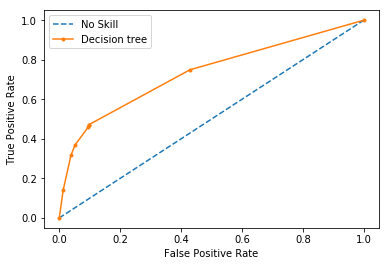

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = tree.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()